In [60]:
import os
import speech_recognition as sr
import librosa
import librosa.display
import pandas as pd

In [3]:
os.listdir(path='Audio_Speech_Actors')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = 'Audio_Speech_Actors'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

1441

In [ ]:
listOfFiles

In [20]:
listOfFiles.index('Audio_Speech_Actors/.DS_Store')

480

In [21]:
listOfFiles.pop(480)

'Audio_Speech_Actors/.DS_Store'

In [23]:
def read_audio(list_audio):
    data_list=[]
    sampling_rate_list=[]
    for audio in list_audio:
        data, sampling_rate = librosa.load(audio)
        data_list.append(data)
        sampling_rate_list.append(sampling_rate)
    return data_list, sampling_rate_list
data_list, sampling_rate_list=read_audio(listOfFiles)

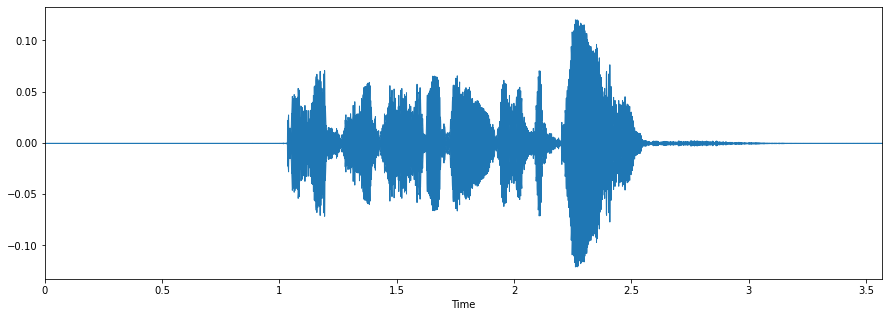

In [31]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data_list[1], sr=sampling_rate_list[1])

<ipython-input-35-d0bdf2658a66>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,x = scipy.io.wavfile.read(listOfFiles[0])
<ipython-input-35-d0bdf2658a66>:26: RuntimeWarning: divide by zero encountered in log
  X[i,:] = np.log(np.abs(z[:nfft//2]))


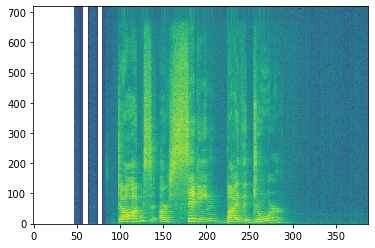

In [35]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read(listOfFiles[0])

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [37]:
listOfFiles

['Audio_Speech_Actors/Actor_16/03-01-05-01-02-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-06-01-02-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-06-02-01-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-05-02-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-07-01-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-04-01-01-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-04-02-02-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-07-02-02-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-08-02-02-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-08-01-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-03-02-02-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-03-01-01-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-02-02-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-01-01-02-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-02-01-02-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-03-02-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-03-01-02-01-16.wav',
 'Audio_Speech

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [87]:
data = pd.DataFrame(columns=['Path', 'Emotion', 'Emotion_intensity','Statement','Gender']) 

In [88]:
speech_dir = 'Audio_Speech_Actors/'
actors = [dir for dir in os.listdir(speech_dir) if dir.startswith('Actor_')]
print(actors)

['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']


In [89]:
# Iterated through every data folders and the data 
for dir in actors:
    act_dir = os.path.join(speech_dir,dir)
    for wav in os.listdir(act_dir):
        # get file name with labels
        identifiers = wav.split('.')[0].split('-')
        # Extracted file name and stored it in list after spliting
        emotion = (int(identifiers[2]))
        # lable corrsponding to emotion is stored in variable emotion
        emotion_intensity = (int(identifiers[3]))
        if int(identifiers[6])%2 == 0:
            gender = 'female'
        else:
            gender = 'male'
        # extracted gender lable based on label value (even for female and odd for male)
        statement = (int(identifiers[4]))
        # extract statement 
        file_path = os.path.join(act_dir, wav).replace("\\","/")
        # chage the path representation in windows
        data = data.append({"Path": file_path,
                            "Emotion": emotion,
                            "Emotion_intensity": emotion_intensity,
                            "Statement": statement,
                            "Gender": gender,
                             },
                             ignore_index = True
                          )
        # Append the extrated labels to data frame.

In [90]:
data.Emotion.unique()

array([5, 6, 7, 4, 8, 3, 2, 1], dtype=object)

In [91]:
def label_emotion(emotion):
    """
    This method is called to label the emotion into one of 8 categories.
    """
    if emotion == 1 :
        return 'neutral'
    elif emotion == 2:
        return 'calm'
    elif emotion == 3:
        return 'happy'
    elif emotion == 4:
        return 'sad'
    elif emotion == 5:
        return 'angry'
    elif emotion == 6:
        return 'fearful'
    elif emotion == 7:
        return 'disgust'
    else: 
        return 'surprised'

In [92]:
data['Emotion']= data.Emotion.apply(label_emotion)

In [94]:
def label_statement(statement):
    """
    This method is called to label the statement into one of 2 categories.
    """
    if statement == 1 :
        return 'kids'
    else: 
        return 'dogs'

In [95]:
data['Statement']= data.Statement.apply(label_statement)

In [97]:
def label_intensity(intensity):
    """
    This method is called to label the intensity into one of 2 categories.
    """
    if intensity == 1 :
        return 'normal'
    else: 
        return 'strong'

In [98]:
data['Emotion_intensity']= data.Emotion_intensity.apply(label_intensity)

In [117]:
data

,Path,Emotion,Emotion_intensity,Statement,Gender
0,Audio_Speech_Actors/Actor_16/03-01-05-01-02-01...,angry,normal,dogs,female
1,Audio_Speech_Actors/Actor_16/03-01-06-01-02-02...,fearful,normal,dogs,female
2,Audio_Speech_Actors/Actor_16/03-01-06-02-01-02...,fearful,strong,kids,female
3,Audio_Speech_Actors/Actor_16/03-01-05-02-01-01...,angry,strong,kids,female
4,Audio_Speech_Actors/Actor_16/03-01-07-01-01-01...,disgust,normal,kids,female
...,...,...,...,...,...
1435,Audio_Speech_Actors/Actor_08/03-01-03-02-02-02...,happy,strong,dogs,female
1436,Audio_Speech_Actors/Actor_08/03-01-03-01-01-02...,happy,normal,kids,female
1437,Audio_Speech_Actors/Actor_08/03-01-02-02-01-01...,calm,strong,kids,female
1438,Audio_Speech_Actors/Actor_08/03-01-02-01-02-01...,calm,normal,dogs,female


In [123]:
data.Emotion.value_counts()

angry        192
calm         192
disgust      192
surprised    192
fearful      192
sad          192
happy        192
neutral       96
Name: Emotion, dtype: int64

In [134]:
from tqdm import tqdm
input_duration=3

audio = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data))):
    X, sample_rate = librosa.load(data.Path[i],
                                  res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    audio.loc[i] = [feature]

100%|██████████| 1440/1440 [02:42<00:00,  8.85it/s]


In [135]:
audio

,feature
0,"[-55.07453, -55.07453, -55.07453, -55.07453, -..."
1,"[-54.388466, -54.388466, -54.388466, -54.38846..."
2,"[-42.791096, -42.925762, -42.899185, -42.68892..."
3,"[-45.452774, -45.452774, -45.452774, -45.45277..."
4,"[-62.8723, -62.8723, -62.8723, -62.8723, -62.8..."
...,...
1435,"[-52.7948, -53.763607, -55.00385, -54.96499, -..."
1436,"[-53.335293, -54.241184, -52.663242, -53.00668..."
1437,"[-55.19314, -55.72388, -56.97952, -60.7733, -5..."
1438,"[-62.298923, -58.117092, -52.51449, -49.66577,..."


In [138]:
featurs_data = pd.DataFrame(audio['feature'].values.tolist())
labels = data.Emotion
gender= data.Gender

In [139]:
featurs_data = pd.concat([featurs_data,labels,gender], axis=1)

In [140]:
featurs_data

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,Emotion,Gender
0,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,...,-54.697842,-53.741127,-54.621086,-54.546001,-54.562290,-55.074532,-54.986717,-55.074532,angry,female
1,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,...,-54.219997,-54.251675,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,fearful,female
2,-42.791096,-42.925762,-42.899185,-42.688927,-42.425762,-42.087055,-41.129875,-40.550945,-39.232639,-39.827827,...,-42.267982,-42.284805,-42.284805,-42.284805,-42.284805,-42.284805,-42.080303,-42.278969,fearful,female
3,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,...,-45.452774,-44.339504,-45.410488,-45.452774,-45.443420,-44.609249,-44.860779,-45.452774,angry,female
4,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,...,-59.421566,-56.944618,-55.152115,-56.732174,-62.172836,-61.767502,-58.865089,-56.552303,disgust,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-52.794800,-53.763607,-55.003849,-54.964989,-54.323025,-55.138943,-51.768867,-51.738060,-51.537483,-50.650475,...,-47.581318,-45.567196,-45.458992,-42.654377,-41.474724,-40.475830,-38.452927,-36.337105,happy,female
1436,-53.335293,-54.241184,-52.663242,-53.006680,-52.754692,-52.673523,-51.280819,-52.471199,-52.866074,-51.250862,...,-55.375771,-52.620754,NaN,NaN,NaN,NaN,NaN,NaN,happy,female
1437,-55.193138,-55.723881,-56.979519,-60.773300,-55.671585,-53.729599,-53.668484,-53.156345,-54.001930,-55.969090,...,-59.763035,-57.989464,-56.036190,-56.420681,-59.163715,-57.135174,-59.056145,-58.450710,calm,female
1438,-62.298923,-58.117092,-52.514488,-49.665771,-50.454319,-52.708809,-52.650169,-51.722149,-51.405098,-55.263344,...,-51.981689,-52.611149,-54.987103,-55.162971,-54.362507,NaN,NaN,NaN,calm,female


In [155]:
featurs_data.isna().sum()

0            0
1            0
2            0
3            0
4            0
          ... 
256        377
257        377
258        377
Emotion      0
Gender       0
Length: 261, dtype: int64

In [158]:
featurs_data.fillna(0, inplace=True)

In [159]:
featurs_data.isna().sum()

0          0
1          0
2          0
3          0
4          0
          ..
256        0
257        0
258        0
Emotion    0
Gender     0
Length: 261, dtype: int64